## Purpose: Noise

Demonstration: 
    1. Parameter fit
    2. Influence of noise on the Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from PolynomialModel import PolynomialModel
from Fitter import Fitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

noise = numpy.random.randn( N )


We construct data with an increasing amounts of noise and calculate the evidence for polynomial models of inceasing degree. 


    0.010         0   -29.683
    0.010         1   -25.409
    0.010         2   -21.542
    0.010         3     7.935
    0.010         4     2.907
    0.010         5    -2.094
    0.010         6    -7.245


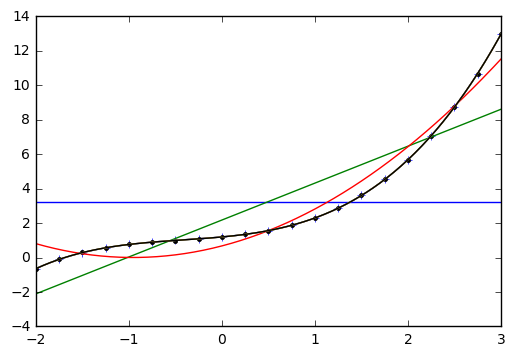

    0.100         0   -29.717
    0.100         1   -25.513
    0.100         2   -21.624
    0.100         3    -9.065
    0.100         4   -13.093
    0.100         5   -17.094
    0.100         6   -21.245


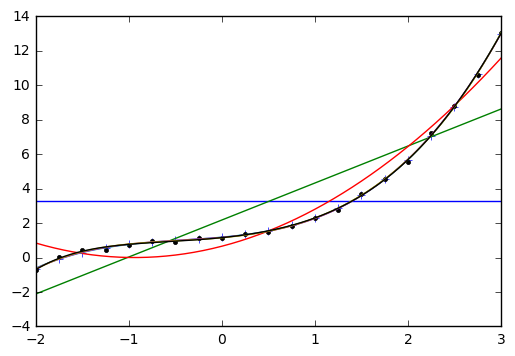

    1.000         0   -30.260
    1.000         1   -27.201
    1.000         2   -25.190
    1.000         3   -26.065
    1.000         4   -29.093
    1.000         5   -32.094
    1.000         6   -35.245


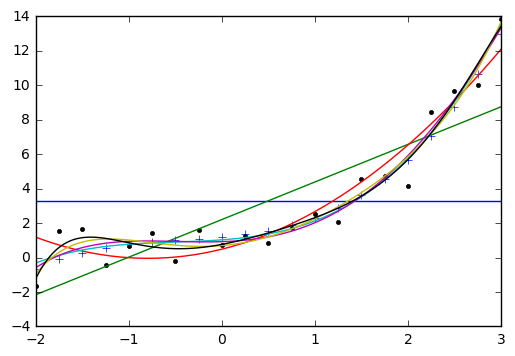

   10.000         0   -38.729
   10.000         1   -39.846
   10.000         2   -41.093
   10.000         3   -43.065
   10.000         4   -45.093
   10.000         5   -47.094
   10.000         6   -49.245


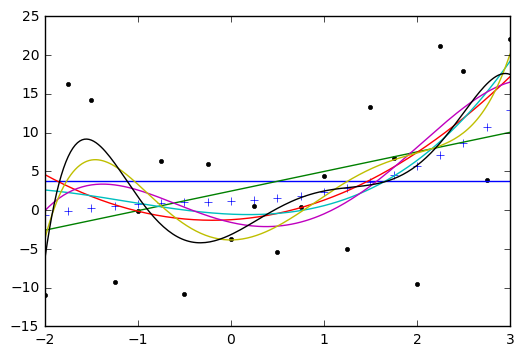

In [10]:
# plotFit( x, y, truth=ym, show=False )
yy = numpy.zeros( (4,7), dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
sig = 0.01
for k in range( 4 ):
    y = ym + sig * noise
    plotFit( x, y, truth=ym, show=False )
    for deg in range( 7 ) :
        poly = PolynomialModel( deg )
        np = poly.getNumberOfParameters()
        fitter = Fitter( x, poly )
        param = fitter.fit( y )
        plt.plot( xi, poly( xi ) )
        chisq = fitter.chisq
        stdev = fitter.stdevs
        logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
        print( fmt( sig ), fmt( deg ), fmt( logpr ) )
        yy[k,deg] = logpr
    sig *= 10
    plt.show()

Plot the evidences found: data with noise of 0.01 in green, noise of 0.1 in red, 1 in blue and 10 in magenta. 

Note that the model selection depends on the amount of noise present in the data.
    

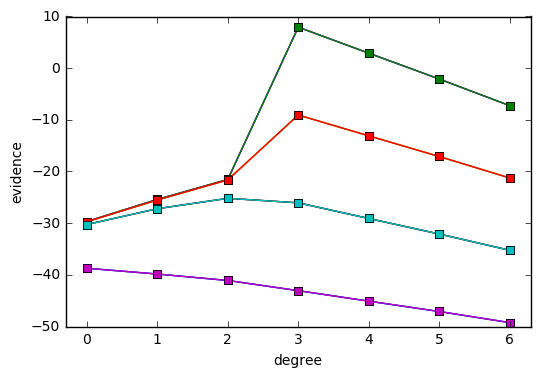

In [9]:
for k in range( 4 ) :
    plt.plot( yy[k,:], '-s' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.xlim( -0.3, 6.3 )
plt.show()